In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from utility import analysis_parameters as ap

lat0,lat1 = -5,5
lon0,lon1 = 143,153

In [28]:
file = ap.test_data_file_name("h1", "02-06")
print(file)
ds = xr.open_dataset(file, engine="netcdf4")
ds = ds.sel(lat=slice(lat0, lat1)).sel(lon=slice(lon0,lon1))
ds

/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h1.2020-02-06-00000.nc


<xarray.Dataset>
Dimensions:        (P3_input_dim: 16, P3_output_dim: 32, ilev: 129, lat: 14, lev: 128, lon: 14, lwband: 16, nbnd: 2, slat: 255, slon: 512, swband: 14, time: 96)
Coordinates:
  * lat            (lat) float64 -4.588 -3.882 -3.176 ... 3.176 3.882 4.588
  * lon            (lon) float64 143.4 144.1 144.8 145.5 ... 151.2 151.9 152.6
  * slat           (slat) float64 -89.65 -88.94 -88.24 ... 88.24 88.94 89.65
  * slon           (slon) float64 359.6 0.3516 1.055 1.758 ... 357.5 358.2 358.9
  * P3_input_dim   (P3_input_dim) int32 1 0 -1 ... -1768989986 1075889833
  * P3_output_dim  (P3_output_dim) int32 228926992 0 ... 538976258 538976288
  * ilev           (ilev) float64 2.255 2.905 3.555 4.205 ... 992.9 997.0 1e+03
  * lev            (lev) float64 2.58 3.23 3.88 4.597 ... 991.0 994.9 998.5
  * lwband         (lwband) float64 130.0 375.0 565.0 ... 2.535e+03 2.965e+03
  * swband         (swband) float64 2.925e+03 3.625e+03 ... 4.4e+04 1.71e+03
  * time           (time) object 2020-02-06 00:00:00 ... 2020-02-06 23:45:00
Dimensions without coordinates: nbnd
Data variables:
    w_stag         (slat) float64 ...
    lat_bnds       (lat, nbnd) float64 ...
    lon_bnds       (lon, nbnd) float64 ...
    gw             (lat) float64 ...
    area           (lat, lon) float64 ...
    LHFLX          (time, lat, lon) float32 ...
    P0             float64 ...
    PRECSL         (time, lat, lon) float32 ...
    PRECT          (time, lat, lon) float32 ...
    PS             (time, lat, lon) float32 ...
    QREFHT         (time, lat, lon) float32 ...
    SHFLX          (time, lat, lon) float32 ...
    TAUX           (time, lat, lon) float32 ...
    TAUY           (time, lat, lon) float32 ...
    TREFHT         (time, lat, lon) float32 ...
    TS             (time, lat, lon) float32 ...
    WINDSPD_10M    (time, lat, lon) float32 ...
    ch4vmr         (time) float64 ...
    co2vmr         (time) float64 ...
    date           (time) int32 ...
    date_written   (time) |S8 ...
    datesec        (time) int32 ...
    f11vmr         (time) float64 ...
    f12vmr         (time) float64 ...
    hyai           (ilev) float64 ...
    hyam           (lev) float64 ...
    hybi           (ilev) float64 ...
    hybm           (lev) float64 ...
    mdt            int32 ...
    n2ovmr         (time) float64 ...
    nbdate         int32 ...
    nbsec          int32 ...
    ndbase         int32 ...
    ndcur          (time) int32 ...
    nsbase         int32 ...
    nscur          (time) int32 ...
    nsteph         (time) int32 ...
    sol_tsi        (time) float64 ...
    time_bnds      (time, nbnd) object ...
    time_written   (time) |S8 ...
Attributes:
    ne:                        1024
    fv_nphys:                  2
    title:                     EAM History file information
    source:                    E3SM Atmosphere Model
    case:                      SCREAMv0.SCREAM-DY2.ne1024pg2.20201127
    username:                  terai
    hostname:                  cori-knl
    git_version:               ad0e20321
    history:                   Fri Dec  4 15:18:51 2020: ncks -O -t 3 --dbg=5...
    Conventions:               CF-1.0
    institution_id:            E3SM-Project
    contact:                   e3sm-data-support@listserv.llnl.gov
    initial_file:              /global/cfs/cdirs/e3sm/inputdata/atm/cam/inic/...
    topography_file:           /global/cfs/cdirs/e3sm/inputdata/atm/cam/topo/...
    time_period_freq:          minute_15
    remap_script:              ncremap
    remap_hostname:            cori04
    remap_version:             4.9.5
    NCO:                       netCDF Operators version 4.9.5 (Homepage = htt...
    nco_openmp_thread_number:  3
    map_file:                  /global/cfs/cdirs/e3sm/terai/mapping/map_ne102...
    input_file:                /global/cscratch1/sd/terai/e3sm_scratch/cori-k...

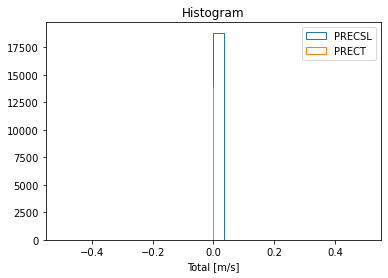

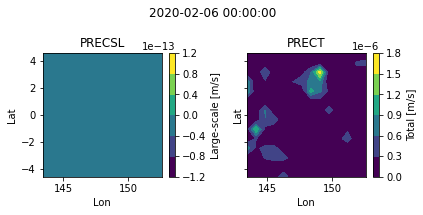

In [31]:
#plotting
fig, ax = plt.subplots(1,1,figsize=(6,4))
log=False
t=0

## h0
# bins=np.linspace(0.01,1,20)
# vars = ["CLDTOT","CLDHGH","CLDMED","CLDLOW"]
# bins = np.linspace(-5,1,25)
# vars = ["TMCLDICE", "TMCLDLIQ", "TMCLDRIM", "TMRAINQM"]
# vmin, vmax = -5, 1
# vars = ["CAPE", "CIN"]
# bins=30

## h1
# vars = ["LHFLX", "SHFLX"]
# vars = ["PRECSL", "PRECT"]

bins=30

#histogram
for v in vars:
    if log:
        np.log10(ds[v]).plot.hist(bins=bins, ax=ax, density=False, histtype="step", label=v)
    else:
        ds[v].plot.hist(bins=bins, ax=ax, density=False, histtype="step", label=v)
plt.legend()
plt.show()

# plot snapshot on latlon
fig, ax = plt.subplots(1, len(vars), figsize=(3*len(vars),3), sharey=True, sharex=True)
for i,axi in enumerate(ax):
    if log:
        np.log10(ds[vars[i]][t]).plot.contourf(ax=ax[i], vmin=vmin, vmax=vmax)
    else:
        ds[vars[i]][t].plot.contourf(ax=ax[i])
    axi.set_ylabel("Lat")
    axi.set_xlabel("Lon")
    axi.set_title(vars[i])
fig.suptitle(ds.time[t].values)
plt.tight_layout()
plt.show()